In [14]:
import os
from glob import glob
from PIL import Image

import xml.etree.ElementTree as ET

In [15]:
os.listdir()

['.ipynb_checkpoints',
 'annotation.csv',
 'classnames.txt',
 'custom_datasets',
 'day4.zip',
 'ResNet50RetinaNet (1).ipynb',
 'resnet50_coco_best_v2.1.0.h5',
 'Untitled.ipynb']

In [16]:
xml_paths = glob('custom_datasets/*.xml')
len(xml_paths)

39

In [17]:
path = xml_paths[0]
tree = ET.parse(path)

In [18]:
root = tree.getroot()
root

<Element 'annotation' at 0x0000016C846065E8>

In [19]:
for i in root :
    print(i)

<Element 'folder' at 0x0000016C845442C8>
<Element 'filename' at 0x0000016C84656458>
<Element 'path' at 0x0000016C846568B8>
<Element 'source' at 0x0000016C84656A48>
<Element 'size' at 0x0000016C8465A3B8>
<Element 'segmented' at 0x0000016C8465A4F8>
<Element 'object' at 0x0000016C8465A548>
<Element 'object' at 0x0000016C8465A868>
<Element 'object' at 0x0000016C8465AB88>
<Element 'object' at 0x0000016C8465AEA8>
<Element 'object' at 0x0000016C8465D228>
<Element 'object' at 0x0000016C8465D548>
<Element 'object' at 0x0000016C8465D868>
<Element 'object' at 0x0000016C8465DB88>


In [20]:
objects = root.findall('object')

In [32]:
data_path = root.find('path').text
data_path = "custom_datasets/" + data_path.split('\\')[-1]
data_path

'custom_datasets/unnamed.jpg'

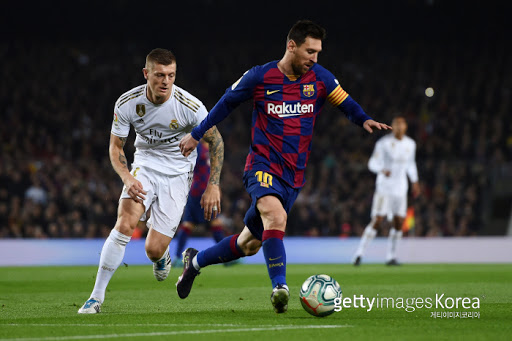

In [33]:
Image.open(data_path)

In [34]:
data_path = root.find('path').text
fname = os.path.basename(data_path)
data_path = os.path.join(fname)
data_path

'unnamed.jpg'

In [35]:
obj = objects[0]

cls_name = obj.find('name').text
xmin = obj.find('bndbox').find('xmin').text
ymin = obj.find('bndbox').find('ymin').text
xmax = obj.find('bndbox').find('xmax').text
ymax = obj.find('bndbox').find('ymax').text

coord = ','.join([xmin, ymin, xmax, ymax, cls_name])
coord

'182,22,372,319,barcelona'

In [36]:
line = ','.join([data_path, coord])
line

'unnamed.jpg,182,22,372,319,barcelona'

In [39]:
lines = []


for path in xml_paths :
    tree = ET.parse(path)
    root = tree.getroot()

    data_path = root.find('path').text
    fname = os.path.basename(data_path)
    data_path = os.path.join(fname)
    data_path = "custom_datasets/" + data_path
    
    objects = root.findall('object')

    for obj in objects :
        cls_name = obj.find('name').text
        xmin = obj.find('bndbox').find('xmin').text
        ymin = obj.find('bndbox').find('ymin').text
        xmax = obj.find('bndbox').find('xmax').text
        ymax = obj.find('bndbox').find('ymax').text

        coord = ','.join([xmin, ymin, xmax, ymax, cls_name])

        line = ','.join([data_path, coord])
        
        lines.append(line)

In [40]:
lines

['custom_datasets/117563_46933_3525.jpg,34,42,140,390,barcelona',
 'custom_datasets/117563_46933_3525.jpg,183,37,266,379,barcelona',
 'custom_datasets/117563_46933_3525.jpg,241,40,314,385,barcelona',
 'custom_datasets/117563_46933_3525.jpg,462,2,560,394,barcelona',
 'custom_datasets/117563_46933_3525.jpg,541,31,592,391,barcelona',
 'custom_datasets/117563_46933_3525.jpg,103,28,198,387,realmadrid',
 'custom_datasets/117563_46933_3525.jpg,291,39,394,393,realmadrid',
 'custom_datasets/117563_46933_3525.jpg,376,44,486,388,realmadrid',
 'custom_datasets/14950_27086_229.jpg,289,12,423,392,barcelona',
 'custom_datasets/14950_27086_229.jpg,37,16,231,393,realmadrid',
 'custom_datasets/19445_26923_2542.jpg,46,46,186,371,barcelona',
 'custom_datasets/19445_26923_2542.jpg,489,86,567,376,barcelona',
 'custom_datasets/19445_26923_2542.jpg,216,44,355,388,realmadrid',
 'custom_datasets/19445_26923_2542.jpg,361,69,496,377,realmadrid',
 'custom_datasets/201503230930031243.jpg,110,95,261,278,barcelona',


In [41]:
with open('annotation.csv','w') as txt :
    txt.write('\n'.join(lines))